In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from utils import *

## [Figures:]()
* [Figure 1: Combining CRISPRa with CRISPRi expands CRISPR circuit design space](#F1)
* [Figure 2: Level-matching enables construction of multi-layer CRISPRa/i circuits in CFS](#F2)
* [Figure 3: Programming distinct multi-layer CRISPRa/i circuit dynamics in CFS](#F3)
* [Figure 4: Level-matching of CRISPRa cascades in E. coli](#F4)
* [Figure 5:  Level-matching of CRISPRa/i cascades in E. coli with titratable input](#F5)
* [Figure 6: Tunable and composable dynamic CRISPRa/i circuits in E. coli](#F6)

## [Supplementary Figures:](#SI)
* [Figure S1: Number of accessible topologies with CRISPRa and CRISPRi](#SI_Topos)
* [Figure S2: CRISPRa on different minimal promoters in CFS](#SI_AP)
* [Figure S3: CRISPRa correlation between CFS and E. coli](#SI_AP2)
* [Figure S4: CRISPRa/i dynamics](#SI_Dynamics)
* [Figure S5: dCas9 and MCP-SoxS plasmid titrations](#SI_trit)
* [Figure S6: Titration of plasmid expressing scRNA from strong constitutive promoter](#SI_trit)
* [Figure S7: Orthogonal I1-FFLs](#SI_IFFL_GFP)
* [Figure S9: CRISPRa results based on J2-RFP in E. coli](#SI_J2)
* [Figure S10: Tuning via promoter design and sgRNA truncations](#SI_Tuning)
* [Figure S11: I1-FFL is a FCD outside the linear range of aTc CRISPRa response](#SI_FCD)
* [Figure S12: Speed of signal propagation](#SI_Speed)
* [Figure S13: Expression of additional guide RNAs in E. coli](#SI_Extra)


## Figure 1D, 1E<a id="#F1"></a>

In [3]:
file = 'raw_data/200205_CRISPRi_titrations_TIDY_BT.csv' # CSV file with tidy data
CRISPRi_tit = pd.read_csv(file,index_col=0)

file = 'raw_data/200316_Titrations_scRNA_act_dCas9_TIDY_BT.csv' # CSV file with tidy data
CRISPRa_tit = pd.read_csv(file,index_col=0)

file = 'raw_data/200427_dCas9_titration_TIDY_BT.csv' # CSV file with tidy data
dCas9_tit = pd.read_csv(file,index_col=0)

# NOTE first point == 0
dCas9_end = trans_filter(dCas9_tit,len(dCas9_tit)-1, range(1,10), False, 'GFP', True)
add_concentrations(dCas9_end, [0.001,0.01,0.05,0.25,1,2,4,8,16], '[dCas9 DNA] (nM)')

act_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, range(20,28), False, 'GFP', True)
add_concentrations(act_end, [0.01,0.1,1,2,4,8,16,24], '[act DNA] (nM)')


scRNA_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, range(7,13), False, False, True, scale='7')
add_concentrations(scRNA_end, [0.1,1,10,0,0.001,0.01], '[scRNA DNA] (nM)')

sgRNA_end = trans_filter(CRISPRi_tit,np.min(np.where(CRISPRi_tit.isna()))-1, range(1,10), False, 'GFP', True)
add_concentrations(sgRNA_end, np.flip([0.001,0.01,0.1,0.5,1,2,4,8,16]), '[sgRNA DNA] (nM)')

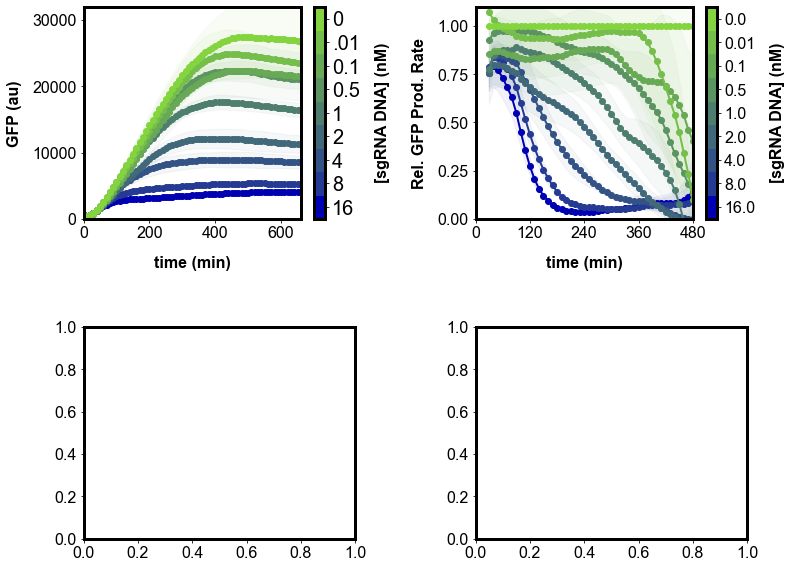

In [4]:
leaks_kinetics = get_kinetics(CRISPRi_tit, range(19,28), 'GFP')

leaks_means = leaks_kinetics.groupby(level=0, axis=1).mean()
leaks_stds = leaks_kinetics.groupby(level=0, axis=1).std()

sgRNA = np.flip([0,0.01,0.1,0.5,1,2,4,8,16])
colors = ['#0000b3', '#243a93', '#335386', '#416979', '#4e7e6e', '#5b9462', '#68a956', '#76be4b', '#83d43f']

# treat data, save csv
y = 'GFP mean'
ylabel = 'RFP (au)'
yerr = 'GFP std'

fig, a = plt.subplots(nrows=2, ncols=2, figsize = (12,10))
ax = a[0,:]
fig.tight_layout(pad=pad)

nmeans = leaks_means
nstds = leaks_stds

# Setting up a colormap
cmap, norm = mpl.colors.from_levels_and_colors(range(len(sgRNA) + 1), colors)
cb = cm.ScalarMappable(cmap=cmap, norm=norm)

nmeans.plot(use_index = True, legend = False, logy = False, ax = ax[0], marker = 'o', color = colors)
for i in range(len(nmeans.columns)):
    m = nmeans.iloc[:,i].to_numpy()
    s = nstds.iloc[:,i].to_numpy()
    t = nmeans.iloc[:,i].index.values
    ax[0].fill_between(t, m-s, m+s, alpha = 0.05, color = colors[i])
    
ax[0].set_ylim([0,32000])
ax[0].set_xlim([0, 660])
ax[0].set_ylabel('GFP (au)')
ax[0].set_xlabel('time (min)')
ax[0].xaxis.set_major_locator(mpl.ticker.FixedLocator([0,200,400,600]))
ax[0].yaxis.set_major_locator(mpl.ticker.FixedLocator([0,10000,20000,30000]))
ax[0].xaxis.labelpad = xpad
ax[0].yaxis.labelpad = ypad
vals = ax[0].get_yticks()

cb = plt.colorbar(cb,ax = ax[0])
cb.set_label('[sgRNA DNA] (nM)', labelpad = ypad*1.5)
cb.set_ticks(np.arange(len(sgRNA))+0.5)
cb.set_ticklabels(np.flip(['0','.01','0.1','0.5','1','2','4','8','16']))
cb.ax.tick_params(labelsize=20)

leaks_kinetics = get_kinetics(CRISPRi_tit, range(19,28), 'GFP')
leaks_means = leaks_kinetics.groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).mean()/30
leaks_stds = leaks_kinetics.groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).std()/30

nmeans = leaks_means.div(leaks_means['27'], axis=0)
nstds = nmeans*(((leaks_stds/leaks_means).to_numpy())**2 + np.tile((leaks_stds['27']/leaks_means['27']).to_numpy(),(9,1)).T**2)**0.5

# Setting up a colormap
cmap, norm = mpl.colors.from_levels_and_colors(range(len(sgRNA) + 1), colors)
cb = cm.ScalarMappable(cmap=cmap, norm=norm)

nmeans.rolling(6, min_periods = 1).mean().plot(use_index = True, legend = False, logy = False, ax = ax[1], marker = 'o', color = colors)
for i in range(len(nmeans.columns)):
    m = nmeans.iloc[:,i].rolling(6, min_periods = 1).mean().to_numpy()
    s = nstds.iloc[:,i].rolling(6, min_periods = 1).mean().to_numpy()
    t = nmeans.iloc[:,i].index.values
    ax[1].fill_between(t, m-s, m+s, alpha = 0.05, color = colors[i])
    
ax[1].set_ylim([0,1.10])
ax[1].set_xlim([0, 480])
ax[1].set_ylabel('Rel. GFP Prod. Rate')
ax[1].set_xlabel('time (min)')
ax[1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=120))
ax[1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax[1].xaxis.labelpad = xpad
ax[1].yaxis.labelpad = ypad
vals = ax[1].get_yticks()

cb = plt.colorbar(cb,ax = ax[1])
cb.set_label('[sgRNA DNA] (nM)', labelpad = ypad*1.5)
cb.set_ticks(np.arange(len(sgRNA))+0.5)
cb.set_ticklabels(sgRNA)


#fig.savefig("210330_Fig1_raw.svg", format = 'svg')


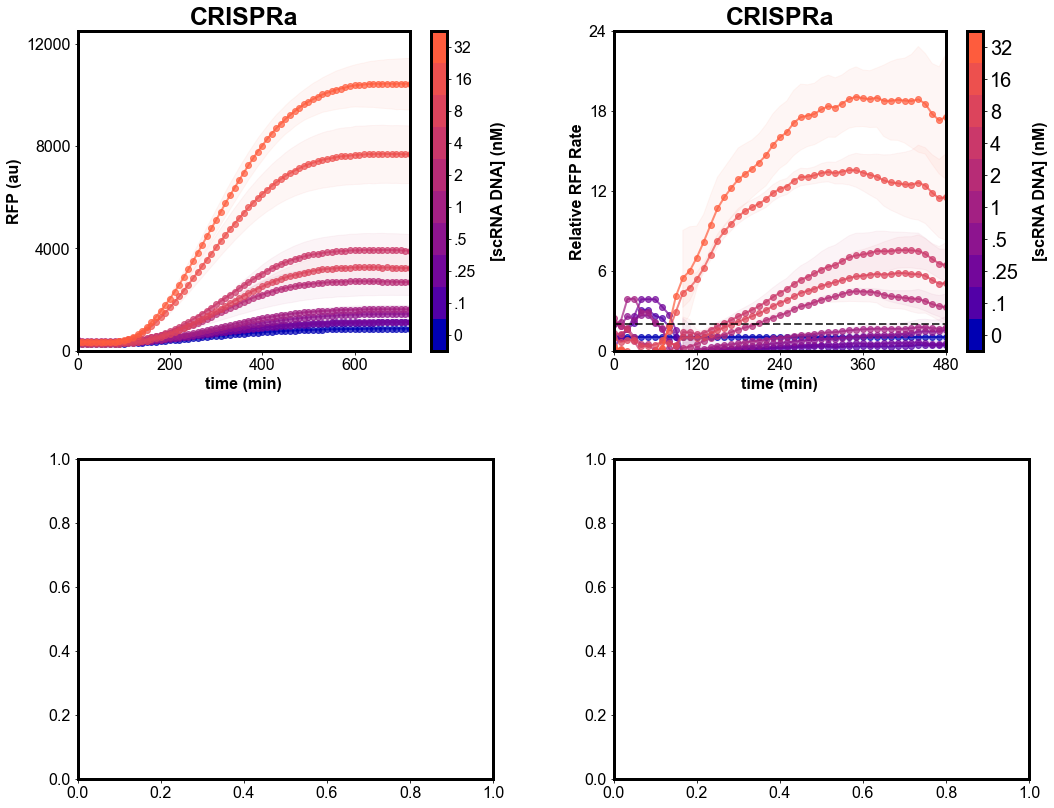

In [5]:
#Figure 1
colsA = ['0','.1','.25','.5','1','2','4','8','16','32']
colorA = ['#0000b3', '#5200a7', '#73079b', '#8d148f', '#a32083', '#b72c76', '#ca386a', '#dc445c', '#ed504e', '#fe5c3d']

meansAr = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRa_raw', names = ['time',*colsA], usecols = 'B:L', skiprows = 4, nrows = 97)
stdsAr = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRa_raw', names = colsA, usecols = 'O:X', skiprows = 4, nrows = 97)
meansAr.time = meansAr.time.map(lambda t: t.hour*60+t.minute)

meansAn = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRa_normRate', names = ['time',*colsA], usecols = 'D:N', skiprows = 8, nrows = 97)
stdsAn = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRa_normRate', names = colsA, usecols = 'Q:Z', skiprows = 8, nrows = 97)
meansAn.time = meansAn.time.map(lambda t: t.hour*60+t.minute)

colsI = ['16','8','4','2','1','0.5','0.1','0.01','0']
colorI = ['#fe5c3d', '#eb4f50', '#d84160', '#c3346f', '#ae267d', '#96188a', '#7a0a98', '#5700a6', '#0000b3']

meansIr = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRi_raw', names = ['time',*colsI], usecols = 'A:J', skiprows = 9, nrows = 87)
stdsIr = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRi_raw', names = colsI, usecols = 'M:U', skiprows = 9, nrows = 87)
meansIr.time = meansIr.time.map(lambda t: t.hour*60+t.minute)

meansIn = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRi_normRate', names = ['time',*colsI], usecols = 'B:K', skiprows = 7, nrows = 87)
stdsIn = pd.read_excel('raw_data/201208_Fig1_fig2_data_plotting.xlsx', sheet_name = 'Fig1_CRISPRi_normRate', names = colsI, usecols = 'Q:Y', skiprows = 7, nrows = 87)
meansIn.time = meansIr.time

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,13))
fig.tight_layout(pad=pad)

# Setting up a colormap
cmap, norm = mpl.colors.from_levels_and_colors(range(len(colsA)+1), colorA)
cb = cm.ScalarMappable(cmap=cmap, norm=norm)

for c, cc in zip(colsA,colorA):
    ax[0,0].plot(meansAr.time, meansAr[c],'o-', color = cc, alpha = 0.7)
    ax[0,0].fill_between(meansAr.time, (meansAr[c]-stdsAr[c]), (meansAr[c]+stdsAr[c]), color = cc, alpha = 0.05)
    
ax[0,0].set_ylim([0,12500])
ax[0,0].set_xlim([0,720])
ax[0,0].set_xlabel('time (min)')
ax[0,0].set_ylabel('RFP (au)')
ax[0,0].set_title('CRISPRa')
ax[0,0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax[0,0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = plt.colorbar(cb,ax = ax[0,0])
cb.set_label('[scRNA DNA] (nM)', labelpad = ypad*1.5)
cb.set_ticks(np.arange(len(colsA))+0.5)
cb.set_ticklabels(colsA)


# Setting up a colormap
cmap, norm = mpl.colors.from_levels_and_colors(range(len(colsA)+1), colorA)
cb = cm.ScalarMappable(cmap=cmap, norm=norm)

for c, cc in zip(colsA,colorA):
    ax[0,1].plot(meansAn.time, meansAn[c].rolling(6, min_periods = 1).mean(),'o-', color = cc, alpha = 0.7)
    ax[0,1].fill_between(meansAn.time.iloc[10:], (meansAn[c]-stdsAn[c]).rolling(6, min_periods = 1).mean().iloc[10:], (meansAn[c]+stdsAn[c]).rolling(6, min_periods = 1).mean().iloc[10:], color = cc, alpha = 0.05)
    
ax[0,1].set_ylim([0,24])
ax[0,1].set_xlim([0,480])
ax[0,1].set_xlabel('time (min)')
ax[0,1].set_ylabel('Relative RFP Rate')
ax[0,1].set_title('CRISPRa')
ax[0,1].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax[0,1].xaxis.set_major_locator(mpl.ticker.FixedLocator([0,120,240,360,480]))
ax[0,1].plot([0,480],[2,2],'k--', alpha = 0.75)

cb = plt.colorbar(cb,ax = ax[0,1])
cb.set_label('[scRNA DNA] (nM)', labelpad = ypad*1.5)
cb.set_ticks(np.arange(len(colsA))+0.5)
cb.set_ticklabels(colsA)
cb.ax.tick_params(labelsize=20) 


#fig.savefig("210330_Fig1F.svg", format = 'svg')


## Figure 2A, 2C<a id="#F2"></a>

In [6]:
file = 'raw_data/200310_scRNA_titrations_TIDY_BT.csv' # CSV file with tidy data
CRISPRa_tit = pd.read_csv(file,index_col=0)

scRNA_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, ['B',1,2,3,4,5,6,7,8,9], background = False,stats= True, scale = '1')
add_concentrations(scRNA_end, [0,0.1,0.5,1,2,4,8,16,32], '[scRNA DNA] (nM)')

J206_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, [10,11,12,13,14,15,16,17,18], background = False,stats= True, scale = '10')
add_concentrations(J206_end, [0,0.1,0.5,1,2,4,8,16,32], '[scRNA DNA] (nM)')

file = 'raw_data/200205_CRISPRi_titrations_TIDY_BT.csv' # CSV file with tidy data
CRISPRi_tit = pd.read_csv(file,index_col=0)

sgRNA_end = trans_filter(CRISPRi_tit,np.min(np.where(CRISPRi_tit.isna()))-1, range(1,10), background = False,stats= True, scale = '9')
add_concentrations(sgRNA_end, np.flip([0,0.01,0.1,0.5,1,2,4,8,16]), '[sgRNA DNA] (nM)')

C:\Users\dex36\.conda\envs\jupy\lib\site-packages\lmfit\confidence.py:326: UserWarning: maxiter=200 reached and prob(sigma=1.003256884658373) = 0.9861505335246706 < max(sigmas).
  warn(errmsg)
C:\Users\dex36\.conda\envs\jupy\lib\site-packages\lmfit\confidence.py:319: UserWarning: Bound reached with prob(sigma=1.5) = 0.0 < max(sigmas)
  warn(errmsg)
C:\Users\dex36\.conda\envs\jupy\lib\site-packages\lmfit\confidence.py:334: UserWarning: rel_change=9.946154855319136e-06 < 1e-05 at iteration 112 and prob(amplitude=355.785424494266) = 0.9949031032794625 < max(sigmas).
  warn(errmsg)
C:\Users\dex36\.conda\envs\jupy\lib\site-packages\lmfit\confidence.py:334: UserWarning: rel_change=8.828066886353561e-06 < 1e-05 at iteration 29 and prob(center=116.99792710226487) = 0.995891255111876 < max(sigmas).
  warn(errmsg)


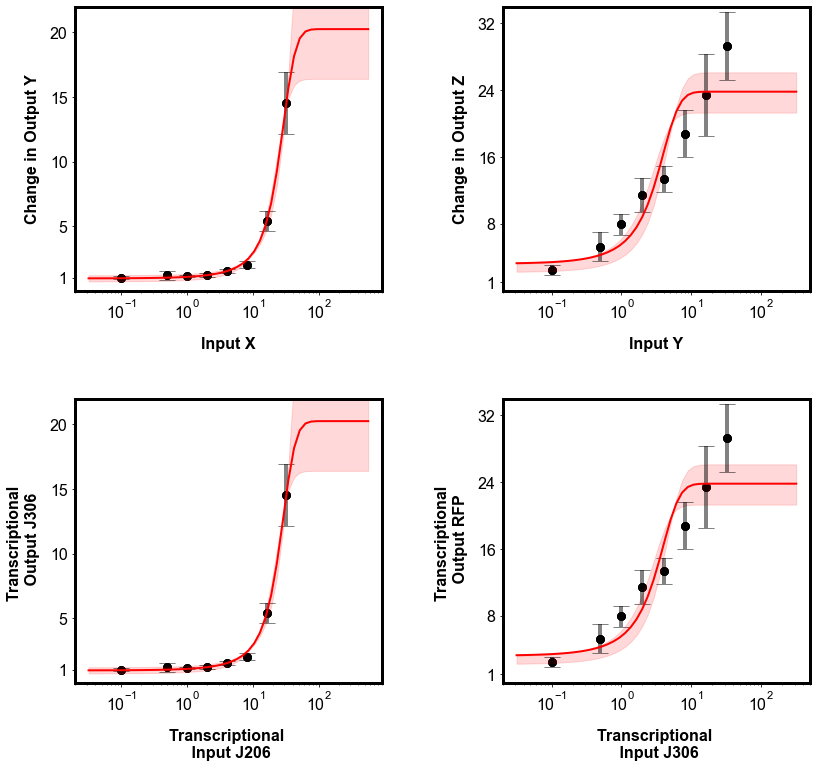

In [7]:
# Figure 1: Component Titrations
from scipy.optimize import curve_fit
import lmfit as lmf

def sigmoid(x, L ,x0, k, b):
    return L / (1 + np.exp(-k*(x-x0)))+b


x = scRNA_end['[scRNA DNA] (nM)'][:-6]
y = scRNA_end['(RFPEx/1)'][:-6]
step_mod = lmf.models.StepModel(form='logistic')
pars = step_mod.guess(y, x=x)
pars['sigma'].value = 1
pars['sigma'].max = 1.5
mod = step_mod
out = mod.fit(y, pars, x=x, max_nfev = 500)
xnew = np.logspace(-1.5,2.5)
ynew = []
for i in [1,3,5]:
    for k in out.conf_interval().keys():
        pars[k].value = pd.DataFrame(out.conf_interval(), columns=out.conf_interval().keys()).iloc[i][k][1]
    ynew.append(out.eval(pars, x = xnew))

x2 = J206_end['[scRNA DNA] (nM)']
y2 = J206_end['(RFPEx/10)']
step_mod = lmf.models.StepModel(form='logistic')
pars2 = step_mod.guess(y2, x=x2)
mod = step_mod
out = mod.fit(y2, pars2, x=x2, max_nfev = 500)
xnew2 = np.logspace(-1.5,2.75)
ynew2 = []
for i in [1,3,5]:
    for k in out.conf_interval().keys():
        pars2[k].value = pd.DataFrame(out.conf_interval(), columns=out.conf_interval().keys()).iloc[i][k][1]
    ynew2.append(out.eval(pars2, x = xnew2))
    
# plot

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=pad)

scatter_plot(ax[0,1], scRNA_end, '[scRNA DNA] (nM)','(RFPEx/1) mean', '(RFPEx/1) std', 'Change in Output Z', 'Input Y')
scatter_plot(ax[0,0], J206_end, '[scRNA DNA] (nM)', '(RFPEx/10) mean', '(RFPEx/10) std', 'Change in Output Y', 'Input X')

ax[0,1].plot(xnew, ynew[1], 'r-')
ax[0,1].fill_between(xnew, ynew[0], ynew[2],color = 'red', alpha = 0.15)
ax[0,1].set_ylim([0,34])
ax[0,1].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,8,16,24,32]))

ax[0,0].plot(xnew2, ynew2[1], 'r-')
ax[0,0].fill_between(xnew2, ynew2[0], ynew2[2],color = 'red', alpha = 0.15)
ax[0,0].set_ylim([0,22])
ax[0,0].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,5,10,15,20]))

scatter_plot(ax[1,1], scRNA_end, '[scRNA DNA] (nM)','(RFPEx/1) mean', '(RFPEx/1) std', 'Transcriptional \n Output RFP', 'Transcriptional \n Input J306')
scatter_plot(ax[1,0], J206_end, '[scRNA DNA] (nM)', '(RFPEx/10) mean', '(RFPEx/10) std', 'Transcriptional \n Output J306', 'Transcriptional \n Input J206')

ax[1,1].plot(xnew, ynew[1], 'r-')
ax[1,1].fill_between(xnew, ynew[0], ynew[2],color = 'red', alpha = 0.15)
ax[1,1].set_ylim([0,34])
ax[1,1].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,8,16,24,32]))

ax[1,0].plot(xnew2, ynew2[1], 'r-')
ax[1,0].fill_between(xnew2, ynew2[0], ynew2[2],color = 'red', alpha = 0.15)
ax[1,0].set_ylim([0,22])
ax[1,0].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,5,10,15,20]))

#fig.savefig("201129_level-matching.svg", format = 'svg')

## Figure 2B<a id="#F2"></a>

In [8]:
file = 'raw_data/200527_AofA_analysis_fig2B.xlsx'
means = pd.read_excel(file, sheet_name = 'PlottableAofA', names = ['label','0.5','1','2','4'], index_col = 'label', usecols = 'A:E', skiprows = 3, nrows=2)
stds = pd.read_excel(file, sheet_name = 'PlottableAofA', names = ['label','0.5','1','2','4'], index_col = 'label', usecols = 'H:L', skiprows = 3, nrows=2)

Text(6, 22, '$r^2$: 0.985')

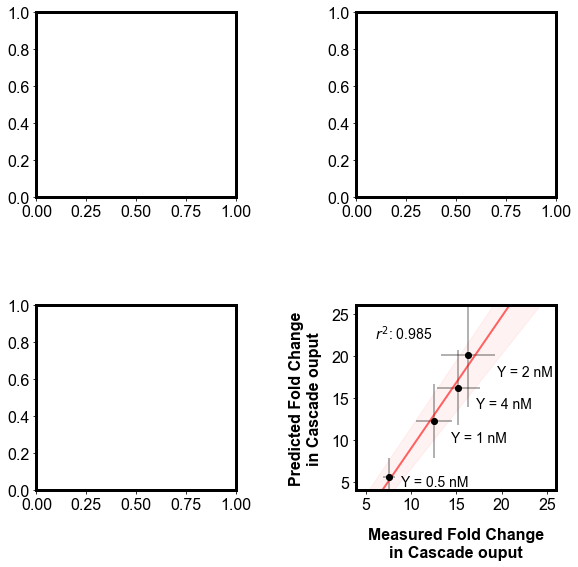

In [9]:
from scipy import stats
from scipy.odr import *

odr = ODR(RealData(x= means.iloc[0],y = means.iloc[1],sx= stds.iloc[0],sy = stds.iloc[1]),
          Model(lambda B,x: B[1]+x*B[0]), beta0=[0., 1.])

# Run the regression.
out = odr.run()
# Use the in-built pprint method to give us results.
# out.pprint()
low_fit = np.poly1d(out.beta - out.sd_beta)
high_fit = np.poly1d(out.beta + out.sd_beta)

z_on = np.polyfit(means.iloc[0],means.iloc[1], 1)
p_on = np.poly1d(z_on)

slope, intercept, r_value, p_value, std_err = stats.linregress(means.iloc[0], means.iloc[1])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,9.25))
fig.tight_layout(pad=pad)

plt.errorbar(x= means.iloc[0],y = means.iloc[1],xerr= stds.iloc[0],yerr = stds.iloc[1], fmt = 'ko', alpha = 0.3)
plt.errorbar(x= means.iloc[0],y = means.iloc[1], fmt = 'ko')

plt.plot([2,30],p_on([2,30]),"r-", alpha = 0.6)
plt.fill_between([2,30], low_fit([2,30]),high_fit([2,30]),alpha = 0.05, color = 'r' )

plt.xlabel('Measured Fold Change\nin Cascade ouput', labelpad = xpad)
plt.ylabel('Predicted Fold Change\nin Cascade ouput', labelpad = ypad)
plt.xlim([4,26])
plt.ylim([4,26])
plt.gca().xaxis.set_major_locator(mpl.ticker.FixedLocator([5,10,15,20,25]))
plt.gca().yaxis.set_major_locator(mpl.ticker.FixedLocator([5,10,15,20,25]))
[plt.text(means.iloc[0][i]+[5,5,6.25,5][i], means.iloc[1][i]-[0.65,2,2,2][i], 'Y = '+means.columns[i]+' nM', ha='center', va='center',size = 14) for i in range(4)]
plt.text(6,22, r'$r^2$: {:.3f}'.format(r_value),size = 14)
#fig.savefig('210504_Fig2B.svg',format = 'svg')

## Figure 2D<a id="#F2"></a>

<ipython-input-10-2fe2a04229ed>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_yticklabels(['{}%'.format(int(100*x)) for x in vals])


Text(2.75, 0.261205305791195, '4.7x')

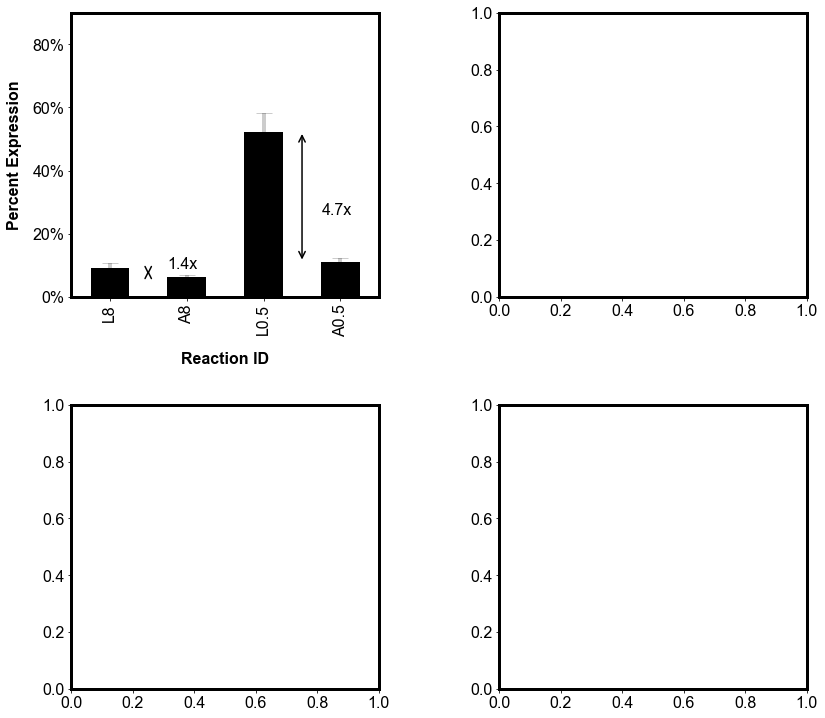

In [10]:
file = 'raw_data/200305_CRISPRi_AofI_titrations_TIDY_DA.csv'
CRISPRi_tit = pd.read_csv(file,index_col=0)

leaks_end = trans_filter(CRISPRi_tit,len(CRISPRi_tit)-1, ['L','L0.5','L8','A0.5','A8'], False, False, True, scale = 'L')
add_concentrations(leaks_end, [0,0,4], '[scRNA DNA] (nM)')
add_concentrations(leaks_end, [0,0.25,0.25], '[sgRNA DNA] (nM)')

leaks_kinetics = get_kinetics(CRISPRi_tit, ['L16','L8','L4','L2','L1','L0.5','L0.1','L0.01','L'], 'RFPEx')
leaks_means = leaks_kinetics.groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).mean()/30
leaks_stds = leaks_kinetics.groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).std()/30

# treat data, save csv
y = '(RFPEx/L) mean'
ylabel = 'Percent Expression'
yerr = '(RFPEx/L) std'

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=pad)

bar_plot(ax[0,0], leaks_end, 'Reaction ID',['L8','A8','L0.5','A0.5'], y, yerr, ylabel)
ax[0,0].set_ylim([0,0.9])
vals = ax[0,0].get_yticks()
ax[0,0].set_yticklabels(['{}%'.format(int(100*x)) for x in vals])

bars = leaks_end.drop_duplicates(y).set_index('Reaction ID')[y].loc[['L8','A8','L0.5','A0.5']]
ax[0,0].annotate("", xy=(0.5, bars.iloc[0]), xytext=(0.5, bars.iloc[1]),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
ax[0,0].text(0.75,bars.iloc[0], '{x:.{d}f}x'.format(x=bars.iloc[0]/bars.iloc[1],d=1))


ax[0,0].annotate("", xy=(2.5, bars.iloc[2]), xytext=(2.5, bars.iloc[3]),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
ax[0,0].text(2.75,bars.iloc[2]/2, '{x:.{d}f}x'.format(x=bars.iloc[2]/bars.iloc[3],d=1))


#fig.savefig("Fig2B.svg", format = 'svg')

## Figure 2E, 2F<a id="#F2"></a>

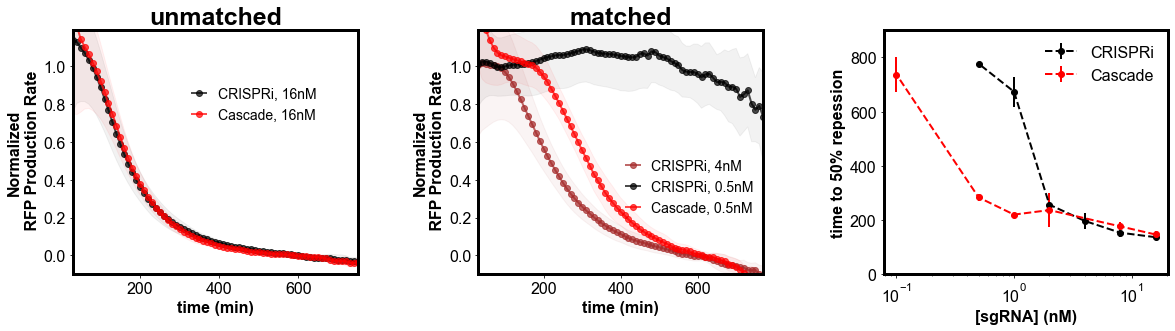

In [11]:
#Figure 2
colsu = ['L','A']
meansu = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = 'Fig 3B analysis', names = ['time',*colsu], usecols = 'A,X,Y', skiprows = 487, nrows = 87)
stdsu = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = 'Fig 3B analysis', names = colsu, usecols = 'AB,AC', skiprows = 487, nrows = 87)
meansu.time = meansu.time.map(lambda t: t.hour*60+t.minute)

colsm = ['L','L0','A0']
meansm = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = 'Fig 3B analysis', names = ['time',*colsm], usecols = 'A,B,C,D', skiprows = 487, nrows = 87)
stdsm = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = 'Fig 3B analysis', names = colsm, usecols = 'F:H', skiprows = 487, nrows = 87)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,6))
fig.tight_layout(pad=pad)

for c, cc in zip(colsu,['k','r']):
    ax[0].plot(meansu.time, meansu[c].ewm(span=7).mean(),'o-', color = cc, alpha = 0.7)
    ax[0].fill_between(meansu.time, (meansu[c]-stdsu[c]).ewm(span=7).mean(), (meansu[c]+stdsu[c]).ewm(span=7).mean(), color = cc, alpha = 0.05)
    
ax[0].set_ylim([-0.1,1.19])
ax[0].set_xlim([30,750])
ax[0].set_xlabel('time (min)')
ax[0].set_ylabel('Normalized\n RFP Production Rate')
ax[0].set_title('unmatched')
ax[0].legend(['CRISPRi, 16nM','Cascade, 16nM'], frameon = False, loc = (0.4,0.6), fontsize = 14, handlelength=1)

for c, cc in zip(colsm,['brown','k','r']):
    ax[1].plot(meansu.time, meansm[c].ewm(span=7).mean(),'o-', color = cc, alpha = 0.7)
    ax[1].fill_between(meansu.time, (meansm[c]-stdsm[c]).ewm(span=7).mean(), (meansm[c]+stdsm[c]).ewm(span=7).mean(), color = cc, alpha = 0.05)
    
ax[1].set_ylim([-0.1,1.19])
ax[1].set_xlim([30,770])
ax[1].set_xlabel('time (min)')
ax[1].set_ylabel('Normalized\n RFP Production Rate')
ax[1].set_title('matched')
ax[1].legend(['CRISPRi, 4nM','CRISPRi, 0.5nM','Cascade, 0.5nM'], frameon = False,loc = (0.5,0.22), fontsize = 14, handlelength=1)

file = 'raw_data/CRISPRai manuscript Figure2F.xlsx'
data = pd.read_excel(file,sheet_name='Sheet2')

ax[2].errorbar(data['I_sgRNA'],data['I_mean'], yerr = data['I_std'],fmt = 'ko--', label = 'CRISPRi')
ax[2].errorbar(data['AI_sgRNA'],data['AI_mean'], yerr = data['AI_std'],fmt = 'ro--', label = 'Cascade')
ax[2].set_xscale('log')
#ax[2].set_xlim([0.005,30])
ax[2].set_ylim([0,900])
ax[2].set_xlabel('[sgRNA] (nM)')
ax[2].set_ylabel('time to 50% repession')
ax[2].legend(frameon=False)

#fig.savefig("210119_Fig2E.svg", format = 'svg')

## Figure 3A<a id="#F3"></a>

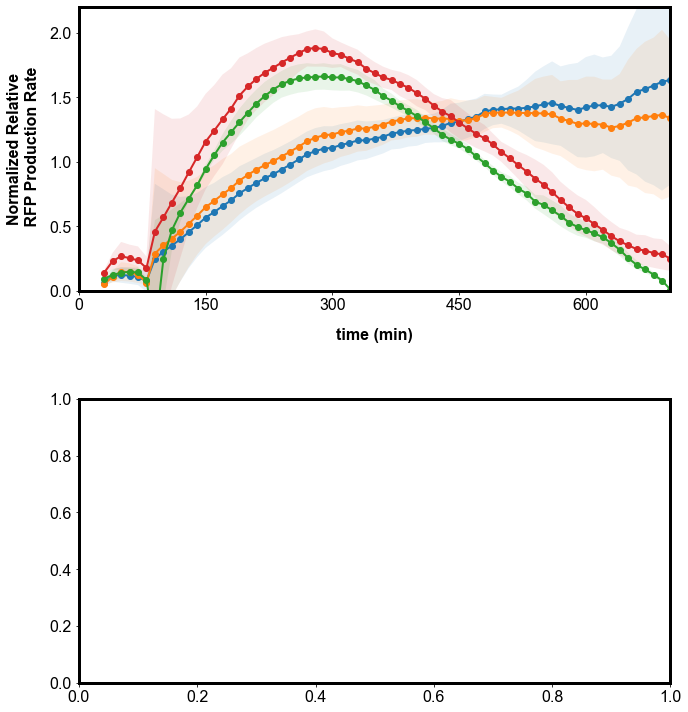

In [12]:
file = 'raw_data/200803_IFFLx2_TIDY_BT.csv'
CRISPRi_tit = pd.read_csv(file,index_col=0)

leaks_kinetics = get_kinetics(CRISPRi_tit, [2,3,4], 'RFPEx')
leaks_means = leaks_kinetics.div(leaks_kinetics.max()).groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).mean()/30
leaks_stds = leaks_kinetics.div(leaks_kinetics.max()).groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).std()/30

nmeans = leaks_means
nstds = leaks_stds
nmeans = leaks_means.div(leaks_means['4'], axis=0)
nstds = nmeans*(((leaks_stds/leaks_means).to_numpy())**2 + np.tile((leaks_stds['4']/leaks_means['4']).to_numpy(),(3,1)).T**2)**0.5

nmeans = nmeans.reindex(columns=['3','2']).ewm(span=7).mean()
nstds = nstds.reindex(columns=['3','2']).ewm(span=7).mean()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (11,12))
fig.tight_layout(pad=pad)
nmeans.plot(use_index = True, legend = False, logy = False, ax = ax[0], style = 'o-')
for i in range(len(nmeans.columns)):
    m = nmeans.iloc[:,i].to_numpy()
    s = nstds.iloc[:,i].to_numpy()
    t = nmeans.iloc[:,i].index.values
    ax[0].fill_between(t, m-s, m+s, alpha = 0.10)
    

leaks_kinetics = get_kinetics(CRISPRi_tit, [1,11,25,4], 'RFPEx')
leaks_means = leaks_kinetics.div(leaks_kinetics.max()).groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).mean()/30
leaks_stds = leaks_kinetics.div(leaks_kinetics.max()).groupby(level=0, axis=1).diff(periods =3,axis=0).groupby(level=0, axis=1).std()/30

nmeans = leaks_means
nstds = leaks_stds
nmeans['11'] = leaks_means['11'].div(leaks_means['25'], axis=0)
nstds['11'] = nmeans['11']*(((leaks_stds['11']/leaks_means['11']).to_numpy())**2 + (leaks_stds['25']/leaks_means['25']).to_numpy().T**2)**0.5
nmeans['1'] = leaks_means['1'].div(leaks_means['4'], axis=0)
nstds['1'] = nmeans['1']*(((leaks_stds['1']/leaks_means['1']).to_numpy())**2 + (leaks_stds['4']/leaks_means['4']).to_numpy().T**2)**0.5

nmeans = nmeans.reindex(columns=['11','1']).ewm(span=7).mean()
nstds = nstds.reindex(columns=['11','1']).ewm(span=7).mean()

nmeans.plot(use_index = True, legend = False, logy = False, ax = ax[0], style = 'o-')
for i in range(len(nmeans.columns)):
    m = nmeans.iloc[:,i].to_numpy()
    s = nstds.iloc[:,i].to_numpy()
    t = nmeans.iloc[:,i].index.values
    ax[0].fill_between(t, m-s, m+s, alpha = 0.10)
    
ax[0].set_ylabel('Normalized Relative\n RFP Production Rate')
ax[0].set_xlabel('time (min)')
ax[0].set_ylim([0, 2.2])
ax[0].set_xlim([0, 700])
ax[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
ax[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax[0].xaxis.labelpad = xpad
ax[0].yaxis.labelpad = ypad

#fig.savefig("201213_Fig3_IFFLs.svg", format = 'svg')


## Figure 4B<a id="#F4"></a>

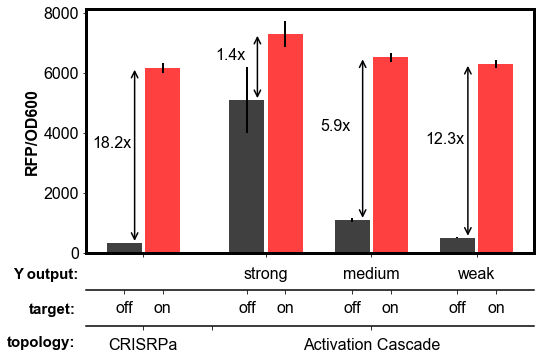

In [13]:
# Figure 4C
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

means = pd.read_excel('raw_data/201111_AofA_E.coli.xlsm', sheet_name = 1, usecols = 'A:H', skiprows = 7, nrows = 2)
stds = pd.read_excel('raw_data/201111_AofA_E.coli.xlsm', sheet_name = 1, usecols = 'N:U', skiprows = 7, nrows = 2)

meansb = pd.read_excel('raw_data/201113_Figure4Cbottom.xlsx', sheet_name = 0, usecols = 'B:G', skiprows = 4, nrows = 2)
stdsb = pd.read_excel('raw_data/201113_Figure4Cbottom.xlsx', sheet_name = 0, usecols = 'K:P', skiprows = 4, nrows = 2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (9,6))
fig.tight_layout(pad=pad)
x = np.array([1,1.55,2.75,3.3,4.25,4.8,5.75,6.3])
ax.bar(x,means.iloc[0,:], yerr = stds.iloc[0,:], alpha = 0.75, width = 0.5, color = [*['k','r']*4])
ax.set_ylabel('RFP/OD600')


for i in range(0,7,2):
    ax.annotate("", xy=(x[i]+0.15, means.iloc[0,i]), xytext=(x[i]+0.15, means.iloc[0,i+1]),
                 arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
    ax.text(x[i]-0.45,250+(means.iloc[0,i+1]+means.iloc[0,i])/2, '{x:.{d}f}x'.format(x=means.iloc[0,i+1]/means.iloc[0,i],d=1))

mpl.rcParams['axes.linewidth'] = 1.5

x2 = (x[1:]+x[:-1])/2
ax.set_xticks(x2[::2])
ax.set_xticklabels(['','strong','medium','weak'])


# Second X-axis
ax2 = ax.twiny(); ax2.set_xlim(ax.get_xlim())
x2 = (x[1:]+x[:-1])/2
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.15))

ax2.set_xticks(x)
ax2.set_xticklabels(4*['off','on'], rotation = 0)

ax3 = ax.twiny(); ax3.set_xlim(ax.get_xlim())
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
ax3.spines["bottom"].set_position(("axes", -0.3))

ax3.set_xticks([x2[0],2.25,x2[4]])
ax3.set_xticklabels(['CRISRPa','','Activation Cascade'])

ax.tick_params(axis='x', which='major', pad=10)
ax.set_xlabel('Y output:', size = 15)
ax.xaxis.set_label_coords(-0.09, -0.06)
ax2.tick_params(axis='x', which='major', pad=8)
ax2.set_xlabel('target:', size = 15)
ax2.xaxis.set_label_coords(-0.075, -0.205)
ax3.tick_params(axis='x', which='major', pad=8)
ax3.set_xlabel('topology:', size = 15)
ax3.xaxis.set_label_coords(-0.1, -0.34)

mpl.rcParams['axes.linewidth'] = 3

#fig.savefig("201111_Fig4c.svg", format = 'svg')

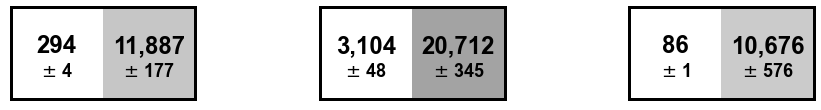

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (14,6))
fig.tight_layout(pad=pad)

k = 0
for i in range(3):
    ax[i].imshow(meansb.iloc[0,k:k+2].to_numpy()[np.newaxis,::],cmap = 'binary', vmax = meansb.max().max()*2.5)
    for y in range(meansb.shape[0]):
        for x in range(2):
            ax[i].text(x, y-0.075, '{:,.0f}'.format(meansb.iloc[y, k+x]),horizontalalignment='center',verticalalignment='center', color = 'k', fontweight ='bold', size = 24)
            ax[i].text(x, y+0.2, '$\pm$ %.0f' % stdsb.iloc[y, k+x],horizontalalignment='center',verticalalignment='center', color = 'k',fontweight ='bold', size = 18)
        k = k + 2
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.savefig("201111_Fig4c_part2.svg", format = 'svg')

## Figure 5B<a id="#F5"></a>

(0.1, 5.9)

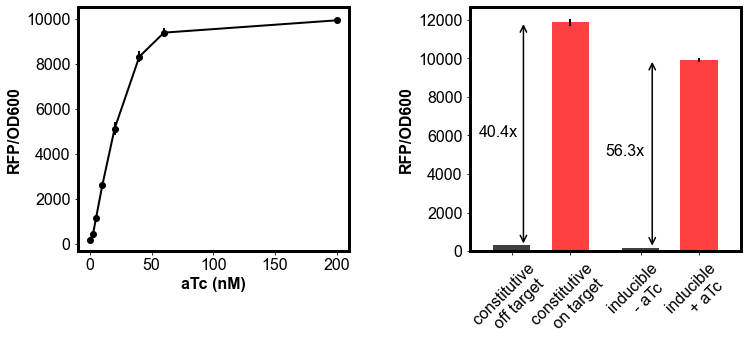

In [15]:
means = pd.read_excel('raw_data/201112AofIEcoli_Fig4AandB.xlsm', sheet_name = 'Figure 4A plotting data', names = ['aTc','306'], usecols = 'A:B', skiprows = 39, nrows = 8)
stds = pd.read_excel('raw_data/201112AofIEcoli_Fig4AandB.xlsm', sheet_name = 'Figure 4A plotting data', names = ['306'], usecols = 'C', skiprows = 39, nrows = 8)
bars = pd.read_excel('raw_data/201112AofIEcoli_Fig4AandB.xlsm', sheet_name = 'Figure 4A plotting data', names = ['label','mean','std','AR'], usecols = 'A:D', skiprows = 25, nrows = 4)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=pad)

ax[0].errorbar(means.aTc, means['306'], stds['306'], fmt = 'ko-')
ax[0].set_xlabel('aTc (nM)')
ax[0].set_ylabel('RFP/OD600')

ax[1].bar([1,2.25,3.75,5],bars.iloc[:,1], yerr = bars.iloc[:,2], color = ['k','r','k','r'], alpha = 0.75)
ax[1].set_ylabel('RFP/OD600')
ax[1].set_xticks([1,2.25,3.75,5])
ax[1].set_xticklabels(['constitutive \n off target','constitutive \n on target','inducible \n - aTc','inducible \n + aTc'], rotation = 45)

ax[1].annotate("", xy=(1.25, bars.iloc[0,1]), xytext=(1.25, bars.iloc[1,1]),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
ax[1].text(0.3,bars.iloc[1,1]/2, '{x:.{d}f}x'.format(x=bars.iloc[1,3],d=1))

ax[1].annotate("", xy=(4, bars.iloc[2,1]), xytext=(4, bars.iloc[3,1]),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
ax[1].text(3,bars.iloc[3,1]/2, '{x:.{d}f}x'.format(x=bars.iloc[3,3],d=1))

ax[1].set_xlim([0.1,5.9])

#fig.savefig("201118_Fig4A.svg", format = 'svg')

## Figure 5C<a id="#F5"></a>

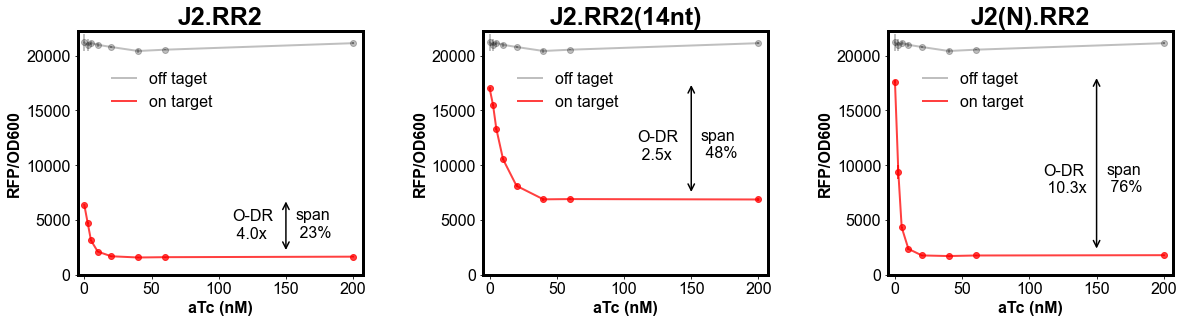

In [16]:
from matplotlib import container
cols = ['off target','J2.RR2','J2.RR2(14nt)','J2(N).RR2']
means = pd.read_excel('raw_data/201112AofIEcoli_Fig4AandB.xlsm', sheet_name = 'Figure 4B plotting data', names = ['aTc',*cols], usecols = 'A:E', skiprows = 4, nrows = 8) # or 12
stds = pd.read_excel('raw_data/201112AofIEcoli_Fig4AandB.xlsm', sheet_name = 'Figure 4B plotting data', names = cols, usecols = 'H:K', skiprows = 4, nrows = 8)
#means.aTc[0] = 2.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,6))
fig.tight_layout(pad=pad)

IDR = []
for i,k in enumerate([cols[1],cols[2],cols[3]]):

    ax[i].errorbar(means.aTc[:], means['off target'][:], stds['off target'][:], fmt = 'ko-',alpha = 0.25, label = 'off taget')
    ax[i].errorbar(means.aTc[:], means[k][:], stds[k][:], fmt ='ro-', alpha = 0.75, label = 'on target')
    #ax[i].errorbar(means.aTc[0:2], means['off target'][0:2], stds['off target'][0:2], fmt = 'ko--',alpha = 0.25)
    #ax[i].errorbar(means.aTc[0:2], means[k][0:2], stds[k][0:2], fmt ='ro--', alpha = 0.75)
    
    ax[i].set_xlabel('aTc (nM)') # or aTc (nM)
    ax[i].set_ylabel('RFP/OD600')
    ax[i].set_title(k)
    ax[i].set_ylim([means.min().min()*0.8,means.max().max()*1.05])
    ax[i].set_xlim([-5,207])
    handles, labels = ax[i].get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
    ax[i].legend(handles, labels, frameon=False, markerscale = 0, handlelength = 1.5, loc = (0.1,0.65))
    
    x = means.aTc.iloc[-1]*0.75
    ax[i].annotate("", xy=(x, means[k].max()+500), xytext=(x, means[k].min()+500),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
    
    ax[i].text(x-40,(means[k].max()-means[k].min())/2.75+means[k].min(), 'O-DR\n {x:.{d}f}x'.format(x=means[k].max()/(means[k].min()),d=1))
    ax[i].text(x+7,(means[k].max()-means[k].min())/2.75+means[k].min()+100, 'span\n {x:.{d}f}%'.format(x=(means[k].max()-means[k].min())/(means['off target'].mean())*100,d=0))


#fig.savefig("210119_Fig4B.svg", format = 'svg')

## Figure 6A<a id="#F6"></a>

[0, 0, 'J2(N).RR2', 'off target sgRNA']
[1, 0, 'J2(N).RR2', 'no sgRNA activation']
[2, 0, 'J2(N).RR2', 'IFFL']
[0, 1, 'J2.RR2(14nt)', 'off target sgRNA']
[1, 1, 'J2.RR2(14nt)', 'no sgRNA activation']
[2, 1, 'J2.RR2(14nt)', 'IFFL']
[0, 2, 'J2.RR2', 'off target sgRNA']
[1, 2, 'J2.RR2', 'no sgRNA activation']
[2, 2, 'J2.RR2', 'IFFL']


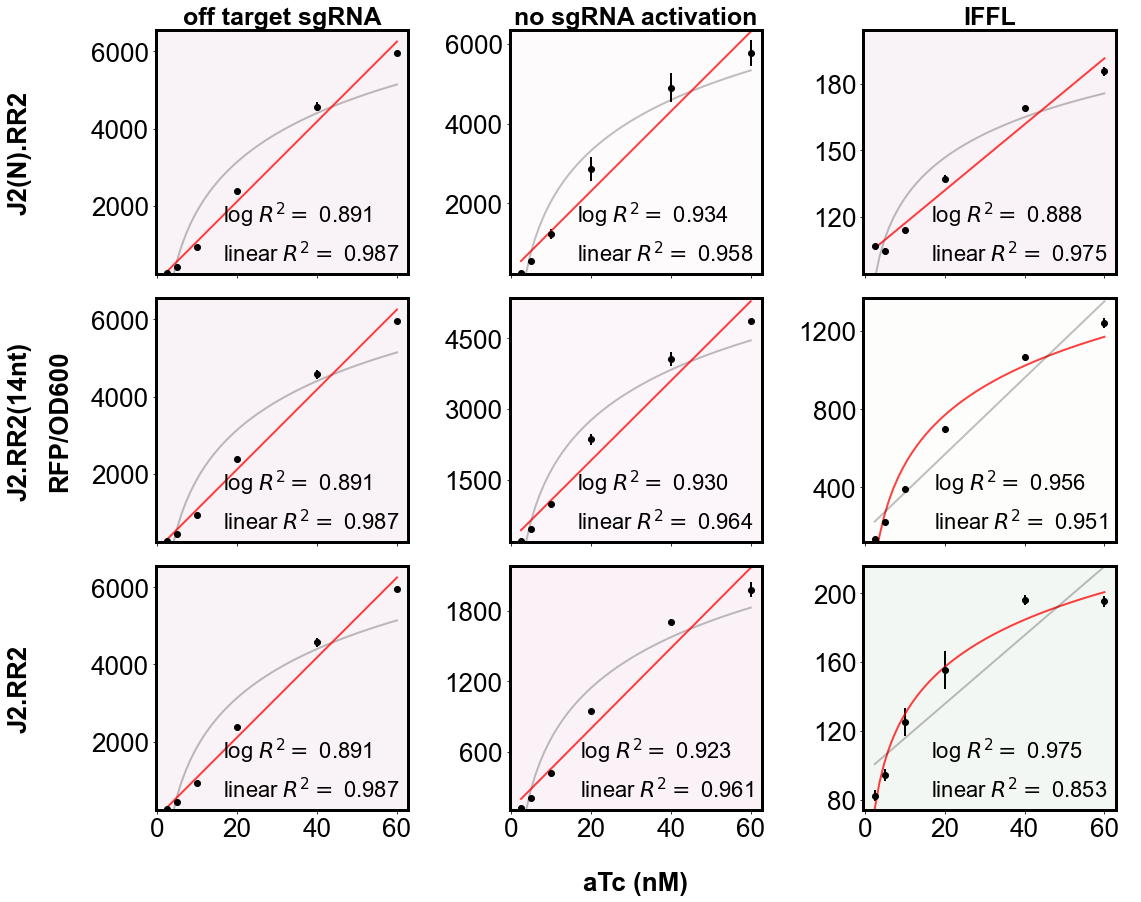

In [17]:
mpl.rcParams['font.size'] = '26'
# Figure 5A
cols = ['off target sgRNA','no sgRNA activation','IFFL']
means = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 5, nrows=8)
stds = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 5, nrows = 8)

meansN = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 19, nrows=8)
stdsN = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 19, nrows = 8)

meansT = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 34, nrows=8)
stdsT = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 34, nrows = 8)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (18,15), sharex = True, sharey=False)
fig.tight_layout(pad=pad)
fit_ratios = []
for i,(m,s,t) in enumerate(zip([meansN, meansT, means], [stdsN, stdsT, stds], ['J2(N).RR2','J2.RR2(14nt)','J2.RR2'])):
    for j,(k,c,a) in enumerate(zip(cols,['k','r','r'],[0.5,0.25,0.75])):
        fit_ratios.append(plot_fits(ax[i,j], m.aTc[1:-1], m[k][1:-1], s[k][1:-1],None, None))
        print([j,i,t,k])
        #ax[0,i].errorbar(m.aTc, m[k], s[k], fmt = c+'o-',alpha = a, label = k)
    ax[i,0].set_ylabel(t+'\n\n')
    
for da,dt in zip(ax[0,:],cols): da.set_title(dt)
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("aTc (nM)", labelpad = xpad*2)
plt.ylabel("RFP/OD600", labelpad = ypad*4)

from scipy.optimize import minimize_scalar
e = minimize_scalar(lambda e: -abs(np.corrcoef(np.sort(fit_ratios),np.arange(len(fit_ratios))**e)[0][1]), bounds=(0.1, 10), method='bounded').x
dummy = {f:o for o,f in enumerate(np.sort(fit_ratios))}
fit_ratios = [dummy[f]**e for f in fit_ratios]
[a.set_facecolor([*mpl.cm.get_cmap('PiYG')(mpl.colors.Normalize(vmin=min(fit_ratios),vmax=max(fit_ratios)/1.05)(i))[:-1],0.05]) for a,i in zip(ax.flat,fit_ratios)]

fig.subplots_adjust(wspace=0.4, hspace=0.1)
mpl.rcParams['font.size'] = '16'

#fig.savefig("210330_Fig5B.svg", format = 'svg')

## Figure 6B<a id="#F6"></a>

In [18]:
circuits = ['CRISPRa','AofI','IFFL']
means = pd.read_excel('raw_data/Continuous dilution_Analysis _4_Diego.xlsx',sheet_name='Plotting_data',names = ['time',*circuits], usecols = 'A:D',skiprows=102)
stds = pd.read_excel('raw_data/Continuous dilution_Analysis _4_Diego.xlsx',sheet_name='Plotting_data',names = [*circuits], usecols = 'G:I',skiprows=102)

Text(2.75, 0.5, 'Relative RFP/OD600')

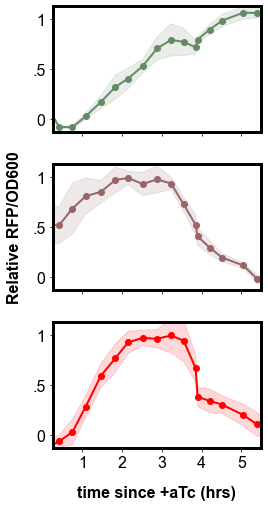

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (4,7), sharex = True, sharey=False)
fig.tight_layout()
n = 2
for k,c,i in zip(circuits,['r','#668A66','#996666'],[2,0,1]):
    ax[i].plot(means.time, means[k].rolling(n).mean(),'o-',color =c)
    ax[i].fill_between(means.time, means[k].rolling(n).mean()+stds[k].rolling(n).mean(), means[k].rolling(n).mean()-stds[k].rolling(n).mean(),color = c, alpha = 0.15)
    ax[i].set_ylim([0,1])
    ax[i].set_xlim([2.25,7.5])
    ax[i].set_yticks([0.1,0.5,0.9])
    ax[i].set_yticklabels([0,'.5',1])

ax[2].set_xticks([3,4,5,6,7])
ax[2].set_xticklabels([1,2,3,4,5])
ax[2].set_xlabel('time since +aTc (hrs)', labelpad=xpad)
ax[1].set_ylabel('Relative RFP/OD600', labelpad=ypad)
#ax[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([0,0.33,0.66,1]))

#fig.savefig("210331_Fig5C.svg", format = 'svg')

# Supplementary Figures <a id="SI"></a>

## Figure S1<a id="SI_Topos"></a>

(0.5, 6.5)

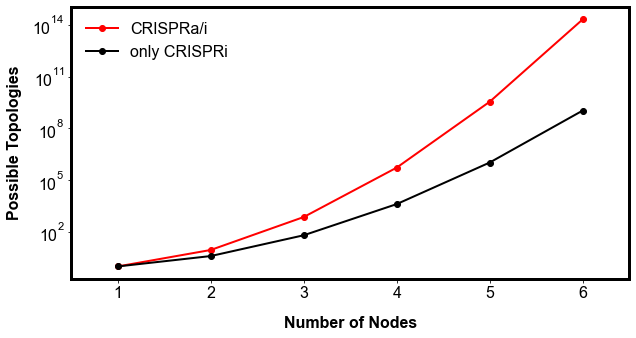

In [20]:
ntop = lambda M,N: (M+1)**(N*(N-1))
nodes = np.arange(1,7,dtype=float)

f = plt.figure(figsize=(10,5))
plt.semilogy(nodes, ntop(2,nodes),'ro-', label = 'CRISPRa/i')
plt.semilogy(nodes, ntop(1,nodes),'ko-', label = 'only CRISPRi')
plt.xlabel('Number of Nodes')
plt.ylabel('Possible Topologies')
plt.gca().xaxis.labelpad = xpad
plt.gca().yaxis.labelpad = ypad
plt.legend(frameon=False)
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
plt.xlim([0.5,6.5])
#f.savefig("201209_FigS1.svg", format = 'svg')

## Figure S2 <a id="SI_AP"></a>

In [21]:
APmean = pd.read_excel('raw_data/TXTL CRISPRa andersons.xlsx', nrows = 3, usecols = 'DS:EE', skiprows = 108).T.rename(columns = {0:'off m', 1:'on m', 2:'AR m'})
APst = pd.read_excel('raw_data/TXTL CRISPRa andersons.xlsx', nrows = 3, usecols = 'DS:EE', skiprows = 115).T.rename(columns = {0:'off s', 1:'on s', 2:'AR s'})
AP = APmean.join(APst)
AP.index = AP.index.map(lambda x: 'J23'+x[:-4])
AP = AP.sort_values('off m')

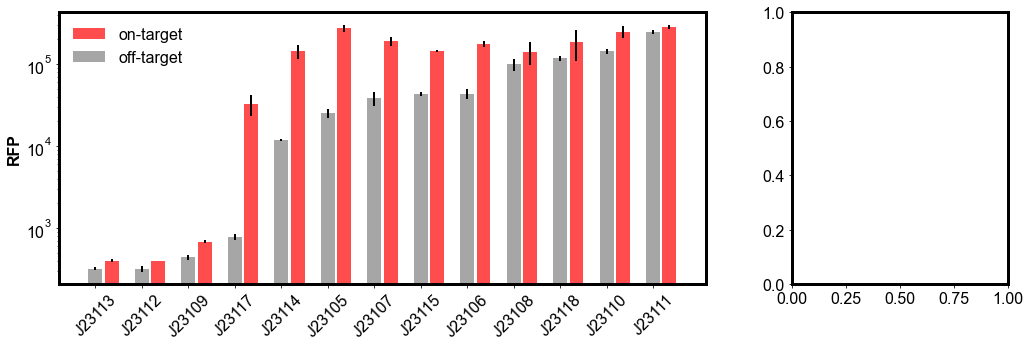

In [22]:
cmap = plt.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=-90000, vmax=400000)
colors = cmap(norm(AP['on m'].values))

f, a = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize = (17,5))
a[0].bar(np.arange(len(AP))+0.35, AP['on m'], yerr = AP['on s'], width = 0.3, color='r', alpha = 0.7)
a[0].bar(np.arange(len(AP)), AP['off m'], yerr = AP['off s'], width = 0.3, color = 'gray', alpha = 0.7)

a[0].set_xticks(np.arange(len(AP)))
a[0].set_xticklabels(AP.index, rotation = 45)
a[0].set_ylabel('RFP')
a[0].set_yscale('log')
a[0].legend(['on-target', 'off-target'], frameon = False)

# a[1].scatter(AP['off m'], AP['AR m'], color = colors)
# a[1].set_xscale('log')
# a[1].set_xlabel('Baseline Expression')
# a[1].set_ylabel('Fold Activation')

#fig.savefig("210412_FigS2.svg", format = 'svg')


## Figure S3 <a id="SI_AP2"></a>

In [23]:
# from Fontana 2020
Jorder = ['109','113','112','117','114','115','108','105','107','106','110','118','111']
Joff = [185.683405,210.830833,210.928365,390.127515,751.331572,1354.92535,2925.30127,3755.80275,4481.32113,6004.4285,8271.30438,15853.4529,20157.9851]
Jon = [249.081809,104.098588,106.684543,13996.8834,17893.9579,20930.2497,15255.2639,25883.8859,23427.1494,24739.2714,25655.8463,27187.2988,21541.0776]
JAR = [1.34143279,0.4937541,0.50578566,35.877714,23.8163263,15.4475298,5.21493772,6.89170534,5.22773278,4.12017087,3.10178964,1.71491339,1.06861264]
JAP = pd.DataFrame(np.array([Joff,Jon, JAR]).T,columns = ['J off m','J on m', 'J AR m'], index = Jorder)
JAP.index = JAP.index.map(lambda x: 'J23'+x)
allAP = JAP.join(AP).sort_values('J off m')

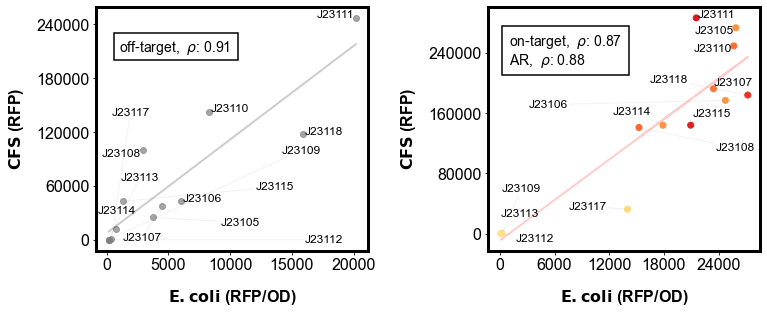

In [24]:
from adjustText import adjust_text
f,a= plt.subplots(1,2,figsize = (12,6))
f.tight_layout(pad=pad)

z_off = np.polyfit(allAP['J off m'], allAP['off m'], 1)
p_off = np.poly1d(z_off)

z_on = np.polyfit(allAP['J on m'], allAP['on m'], 1)
p_on = np.poly1d(z_on)

#plt.errorbar(allAP['J on m'], allAP['on m'], yerr = allAP['on s'])
#plt.errorbar(allAP['J off m'], allAP['off m'], yerr = allAP['off s'])

a[1].scatter(allAP['J on m'], allAP['on m'], color = colors)
a[0].scatter(allAP['J off m'], allAP['off m'], color = 'gray', alpha = 0.7)

fit0 = a[0].plot(allAP['J off m'],p_off(allAP['J off m']),"k-", alpha = 0.2)
fit1 = a[1].plot(allAP['J on m'],p_on(allAP['J on m']),"r-", alpha = 0.2)

texts1 = [a[1].text(allAP['J on m'][i], allAP['on m'][i], allAP.index[i], ha='center', va='center',size = 12) for i in range(len(allAP))]
texts0 = [a[0].text(allAP['J off m'][i], allAP['off m'][i], allAP.index[i], ha='center', va='center',size = 12) for i in range(len(allAP))]

l0 = a[0].text(1000,210000, r'off-target,  $\rho$: {:.2f}'.format(allAP.corr('spearman').loc['J off m','off m']),size = 14)
l1 = a[1].text(1000,250000, r'on-target,  $\rho$: {:.2f}'.format(allAP.corr('spearman').loc['J on m','on m']),size = 14)
ll1 = a[1].text(1000,225000, r'AR,  $\rho$: {:.2f}'.format(allAP.corr('spearman').loc['J AR m','AR m']),size = 14)

a[0].add_patch(mpl.patches.Rectangle((600,200000), 10000, 30000, linewidth=1.5, edgecolor='k', facecolor='none'))
a[1].add_patch(mpl.patches.Rectangle((200,210000), 14000, 65000, linewidth=1.5, edgecolor='k', facecolor='none'))

adjust_text(texts1, add_objects = [*fit1,l1,ll1], force_text = (5,5), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1), ax=a[1])
adjust_text(texts0, add_objects = [*fit0,l0], force_text = (6,5), force_points = (2,-2), force_objects = (0.0,0.0), arrowprops=dict(arrowstyle='-', color='gray', alpha = 0.1), ax = a[0])

for ax  in a:
    ax.set_xlabel(r"$\mathbf{E. coli}$ (RFP/OD)")
    ax.set_ylabel(r"$\mathbf{CFS}$ (RFP)")
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.xaxis.labelpad = xpad
    ax.yaxis.labelpad = ypad

#f.savefig('210315-FigS3.svg', format = 'svg')

## Figure S4 <a id="SI_Dynamics"></a>

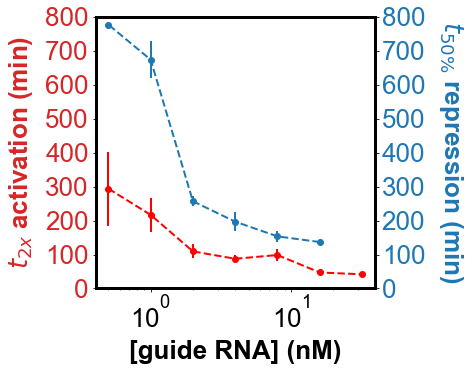

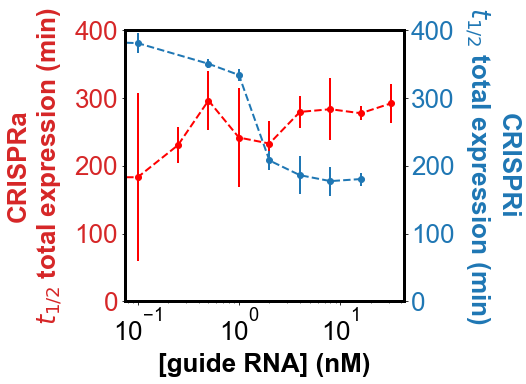

In [26]:
mpl.rcParams['font.size'] = '26'

# from S5witherr.xlsx
scRNA = [0.5,1,2,4,8,16,32]
tAm = [293.86982,216.641753,109.166702,87.4635785,98.4379159,47.0698522,41.7732834]
tAs = [109.01094, 48.9886935, 20.9124473, 11.4822271, 17.2593863, 5.22854668, 1.85671985]

sgRNA = [16,8,4,2,1,0.5]
tI = [136,153,196,256,653,763]

fig, ax1 = plt.subplots(figsize=(5,5))

ax1.errorbar(scRNA,tAm,yerr=tAs, color = 'r',marker ='o',ls='--')
#ax1.set_title('Response Time', pad = 1.5*xpad)
ax1.set_xlabel('[guide RNA] (nM)')
ax1.set_ylabel('$t_{2x}$ activation (min)',  color='tab:red')
ax1.set_xscale('log')
ax1.set_ylim([0,800])
ax1.yaxis.labelpad = ypad
ax1.xaxis.labelpad = 0.5*xpad
ax1.tick_params(axis='y', labelcolor='tab:red')

file = 'raw_data/CRISPRai manuscript Figure2F.xlsx'
data = pd.read_excel(file,sheet_name='Sheet2')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.errorbar(data['I_sgRNA'],data['I_mean'], yerr = data['I_std'],fmt = 'o--', color = color)
ax2.set_ylabel('$t_{50\%}$ repression (min)', color=color, rotation = 270)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,800])
ax2.yaxis.labelpad = 4*ypad

#fig.savefig('210511_Fi1_R.svg')


mpl.rcParams['font.size'] = '26'
file = 'raw_data/Fig1G expectation value.xlsx'
data = pd.read_excel(file,sheet_name='Sheet2')

fig, ax1 = plt.subplots(figsize=(5,5))

ax1.errorbar(data['[scRNA]'],data['A_mean']*10, yerr = data['A_std']*10,fmt = 'ro--')
#ax1.set_title('Timing of Gene Expression', pad = 1.5*xpad)
ax1.set_xlabel('[guide RNA] (nM)')
ax1.set_ylabel('CRISPRa\n$t_{1/2}$ total expression (min)',  color='tab:red')
ax1.set_xscale('log')
ax1.set_ylim([0,400])
ax1.yaxis.labelpad = ypad
ax1.xaxis.labelpad = 0.5*xpad
ax1.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.errorbar(data['[sgRNA]'],data['I_mean']*10, yerr = data['I_std']*10,fmt = 'o--')
ax2.set_ylabel('CRISPRi\n$t_{1/2}$ total expression (min)', color=color, rotation = 270)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,400])
ax2.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax2.yaxis.labelpad = 6.5*ypad

#fig.savefig('210511_Fig1_G.svg')
mpl.rcParams['font.size'] = '16'

## Figure S5, S6 <a id="SI_trit"></a>

In [27]:
file = 'raw_data/200316_Titrations_scRNA_act_dCas9_TIDY_BT.csv' # CSV file with tidy data
CRISPRa_tit = pd.read_csv(file,index_col=0)
file = 'raw_data/200427_dCas9_titration_TIDY_BT.csv' # CSV file with tidy data
dCas9_tit = pd.read_csv(file,index_col=0)

dCas9_end = trans_filter(dCas9_tit,len(dCas9_tit)-1, range(1,10), background = False,stats= True, scale = '1')
add_concentrations(dCas9_end, [0,0.01,0.05,0.25,1,2,4,8,16], '[dCas9 DNA] (nM)')
act_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, range(20,28), background = False,stats= True, scale = '1')
add_concentrations(act_end, [0,0.1,1,2,4,8,16,24], '[act DNA] (nM)')
scRNA_end = trans_filter(CRISPRa_tit,len(CRISPRa_tit)-1, range(7,13), background = False,stats= True, scale='7')
add_concentrations(scRNA_end, [0.1,1,10,0,0.001,0.01], '[scRNA DNA] (nM)')

In [28]:
x = scRNA_end['[scRNA DNA] (nM)'][scRNA_end['[scRNA DNA] (nM)'].sort_values().index]
y = scRNA_end['(RFPEx/7)'][scRNA_end['[scRNA DNA] (nM)'].sort_values().index]

step_mod = lmf.models.StepModel(form='logistic')
pars = step_mod.guess(y, x=x)
mod = step_mod
out = mod.fit(y, pars, x=x, max_nfev = 500)
xnew = np.logspace(-4,2)
ynew = []

for i in [1,3,5]:
    for k in out.conf_interval().keys():
        pars[k].value = pd.DataFrame(out.conf_interval(), columns=out.conf_interval().keys()).iloc[i][k][1]
    ynew.append(out.eval(pars, x = xnew))

C:\Users\dex36\.conda\envs\jupy\lib\site-packages\lmfit\lineshapes.py:426: RuntimeWarning: overflow encountered in exp
  out = (1. - 1./(1. + exp(out)))


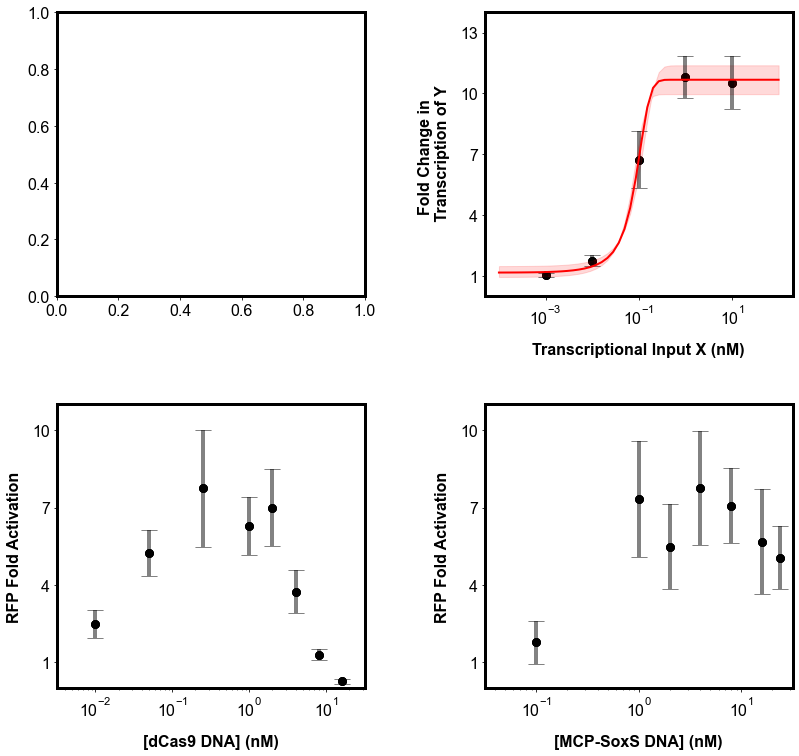

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=pad)

scatter_plot(ax[0,1], scRNA_end, '[scRNA DNA] (nM)','(RFPEx/7) mean', '(RFPEx/7) std','Fold Change in \n Transcription of Y', 'Transcriptional Input X (nM)')
scatter_plot(ax[1,0], dCas9_end, '[dCas9 DNA] (nM)','(RFPEx/1) mean', '(RFPEx/1) std', 'RFP Fold Activation')
scatter_plot(ax[1,1], act_end, '[act DNA] (nM)','(RFPEx/1) mean', '(RFPEx/1) std', 'RFP Fold Activation')

ax[0,1].plot(xnew, ynew[1], 'r-')
ax[0,1].fill_between(xnew, ynew[0], ynew[2],color = 'red', alpha = 0.15)
ax[0,1].set_ylim([0,14])
ax[0,1].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,4,7,10,13]))

ax[1,1].set_xlabel('[MCP-SoxS DNA] (nM)')
ax[1,1].set_ylim([0,11])
ax[1,1].set_xlim([10**(-1.5), 10**(1.5)])
ax[1,1].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,4,7,10,13]))

ax[1,0].set_ylim([0,11])
ax[1,0].set_xlim([10**(-2.5), 10**(1.5)])
ax[1,0].yaxis.set_major_locator(mpl.ticker.FixedLocator([1,4,7,10,13]))

#fig.savefig("210412_FigS4_FigS6.svg", format = 'svg')


## Figure S7 <a id="SI_IFFL_GFP"></a>

In [30]:
t = 72
labels = ['on/on','on/off','off/on','off/off']
meansG = pd.read_excel('raw_data/20_07_08_BH4IFFL_IFFLx2.xlsm', sheet_name = 'GFP', names = labels, usecols = 'AW:AZ', skiprows = t, nrows = 1).to_numpy().squeeze()
stdsG = pd.read_excel('raw_data/20_07_08_BH4IFFL_IFFLx2.xlsm', sheet_name = 'GFP', names =  labels, usecols = 'BC:BF', skiprows = t, nrows = 1).to_numpy().squeeze()

meansR = pd.read_excel('raw_data/20_07_08_BH4IFFL_IFFLx2.xlsm', sheet_name = 'RFP', names = labels, usecols = 'AW:AZ', skiprows = t, nrows = 1).to_numpy().squeeze()
stdsR = pd.read_excel('raw_data/20_07_08_BH4IFFL_IFFLx2.xlsm', sheet_name = 'RFP', names =  labels, usecols = 'BC:BF', skiprows = t, nrows = 1).to_numpy().squeeze()

mG = (meansG-min(meansG))/(max(meansG)-min(meansG))
sG = mG*((stdsG**2 + stdsG[np.argmin(stdsG)]**2)/(meansG-min(meansG))**2 + (stdsG[np.argmax(stdsG)]**2 + stdsG[np.argmin(stdsG)]**2)/(max(meansG)-min(meansG))**2)**0.5

mR = (meansR-min(meansR))/(max(meansR)-min(meansR))
sR = mR*((stdsR**2 + stdsR[np.argmin(stdsR)]**2)/(meansR-min(meansR))**2 + (stdsR[np.argmax(stdsR)]**2 + stdsR[np.argmin(stdsR)]**2)/(max(meansR)-min(meansR))**2)**0.5

<ipython-input-30-5838d56f4df5>:10: RuntimeWarning: divide by zero encountered in true_divide
  sG = mG*((stdsG**2 + stdsG[np.argmin(stdsG)]**2)/(meansG-min(meansG))**2 + (stdsG[np.argmax(stdsG)]**2 + stdsG[np.argmin(stdsG)]**2)/(max(meansG)-min(meansG))**2)**0.5
<ipython-input-30-5838d56f4df5>:10: RuntimeWarning: invalid value encountered in multiply
  sG = mG*((stdsG**2 + stdsG[np.argmin(stdsG)]**2)/(meansG-min(meansG))**2 + (stdsG[np.argmax(stdsG)]**2 + stdsG[np.argmin(stdsG)]**2)/(max(meansG)-min(meansG))**2)**0.5
<ipython-input-30-5838d56f4df5>:13: RuntimeWarning: divide by zero encountered in true_divide
  sR = mR*((stdsR**2 + stdsR[np.argmin(stdsR)]**2)/(meansR-min(meansR))**2 + (stdsR[np.argmax(stdsR)]**2 + stdsR[np.argmin(stdsR)]**2)/(max(meansR)-min(meansR))**2)**0.5
<ipython-input-30-5838d56f4df5>:13: RuntimeWarning: invalid value encountered in multiply
  sR = mR*((stdsR**2 + stdsR[np.argmin(stdsR)]**2)/(meansR-min(meansR))**2 + (stdsR[np.argmax(stdsR)]**2 + stdsR[np.argmin

(-0.4, 3.3)

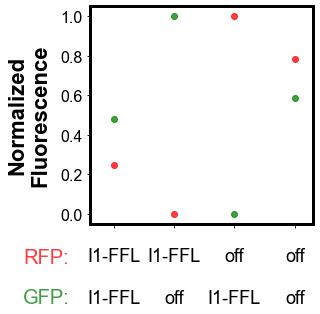

In [31]:
plt.figure(figsize=(4,4))
plt.errorbar([0,1,2,3], mG, fmt='go', alpha = 0.75)
plt.errorbar([0,1,2,3], mR, fmt='ro', alpha = 0.75)
plt.xticks([0,1,2,3],['I1-FFL\n\nI1-FFL','I1-FFL\n\noff','off\n\nI1-FFL','off\n\noff'], rotation = 0, size = 18, y = -0.075)
plt.ylabel('Normalized\nFluorescence', labelpad = ypad, size = 22)
plt.text(-1.5,-0.25,'RFP:', color = 'r', alpha = 0.75, size = 20)
plt.text(-1.5,-0.45,'GFP:', color = 'g', alpha = 0.75, size = 20)

plt.xlim([-0.4,3.3])
#fig.savefig("210412_FigS7.svg", format = 'svg')


## Figure S9<a id="SI_J2"></a>

Text(74.75, 0.5, 'RFP/OD600')

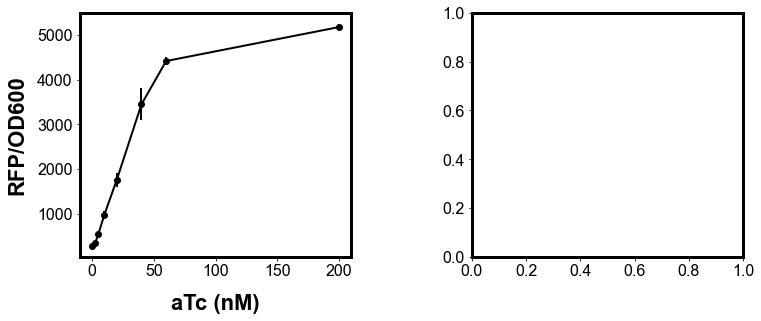

In [32]:
#Figure 4A
means = pd.read_excel('raw_data/CRISPRa on J2_S9.xlsx', names = ['aTc','206'], usecols = 'A:B', skiprows = 3, nrows = 8)
stds = pd.read_excel('raw_data/CRISPRa on J2_S9.xlsx', names = ['206'], usecols = 'C', skiprows = 3, nrows = 8)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=pad)

ax[0].errorbar(means.aTc, means['206'], stds['206'], fmt = 'ko-')
ax[0].set_xlabel('aTc (nM)', labelpad = xpad, size = 22)
ax[0].set_ylabel('RFP/OD600', labelpad = ypad, size= 22)


#fig.savefig("210412_FigS9.svg", format = 'svg')

## Figure S10 <a id="SI_Tuning"></a>

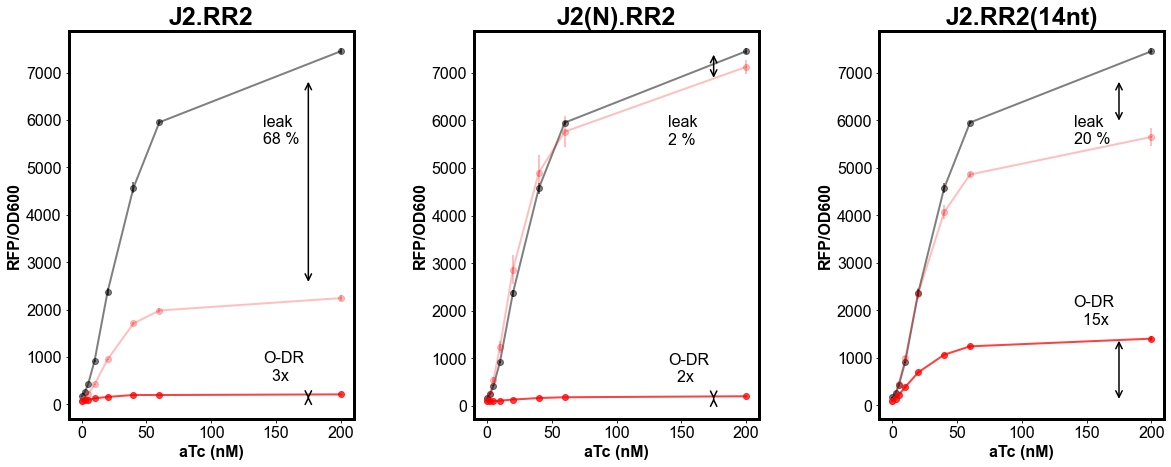

In [33]:
cols = ['off target sgRNA','no sgRNA activation','IFFL']
means = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 5, nrows=8)
stds = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 5, nrows = 8)

meansN = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 19, nrows=8)
stdsN = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 19, nrows = 8)

meansT = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = ['aTc',*cols], usecols = 'A:D', skiprows = 34, nrows=8)
stdsT = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A', names = cols, usecols = 'F:H', skiprows = 34, nrows = 8)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,8))
fig.tight_layout(pad=pad)

for i,(m,s,t) in enumerate(zip([means,meansN, meansT], [stds,stdsN, stdsT], ['J2.RR2','J2(N).RR2','J2.RR2(14nt)'])):
    for (k,c,a) in zip(cols,['k','r','r'],[0.5,0.25,0.75]):
        ax[i].errorbar(m.aTc, m[k], s[k], fmt = c+'o-',alpha = a, label = k)
    ax[i].set_xlabel('aTc (nM)')
    ax[i].set_ylabel('RFP/OD600')
    ax[i].set_title(t)
    handles, labels = ax[i].get_legend_handles_labels()
    handles = [h[0] if isinstance(h, mpl.container.ErrorbarContainer) else h for h in handles]
    #if i == 2: ax[i].legend(handles, labels, frameon=False, markerscale = 0, handlelength = 1.5, loc = (0.25,0.2))
        
    x = 175
    leak = ((np.trapz(x=m.aTc,y=m['off target sgRNA'])-np.trapz(x=m.aTc,y=m['no sgRNA activation']))/np.trapz(x=m.aTc,y=m['off target sgRNA'])*100)

    ax[i].annotate("", xy=(x, m['off target sgRNA'].max()-600), xytext=(x, m['no sgRNA activation'].max()+300),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
    
    ax[i].text(140,5500, 'leak\n{x:.{d}f} %'.format(x=leak,d=0))
    ax[i].text(140,m['IFFL'].max()+300, 'O-DR\n  {x:.{d}f}x'.format(x=m['IFFL'].max()/m['IFFL'].min(),d=0))
    ax[i].annotate("", xy=(x, m['IFFL'].max()), xytext=(x,m['IFFL'].min()),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color = 'k', lw = 1.5))
#fig.savefig("210119_Fig5A.svg", format = 'svg')

## Figure S11 <a id="SI_FCD"></a>

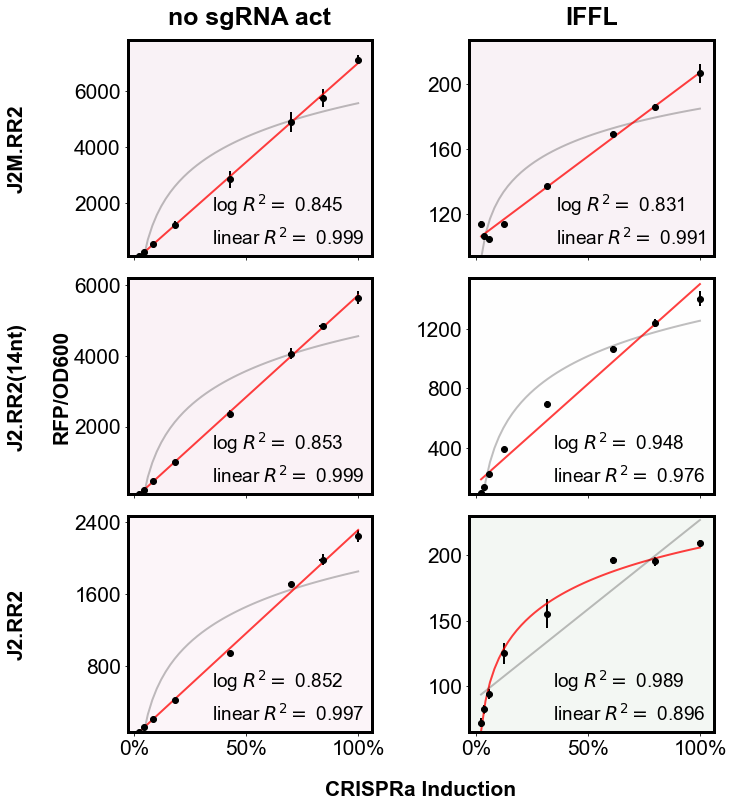

In [34]:
mpl.rcParams['font.size'] = '21'
# Figure 5A
cols = ['J2.RR2','J2M.RR2','J2.RR2(14nt)']

meansA = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A_norm', names = ['aTc',*cols], usecols = 'A:D', skiprows = 3, nrows=8)
stdsA = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A_norm', names = ['aTc',*cols], usecols = 'F:I', skiprows = 3, nrows = 8)

meansB = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A_norm', names = ['aTc',*cols], usecols = 'A:D', skiprows = 16, nrows=8)
stdsB = pd.read_excel('raw_data/201110_Fig5.xlsx', sheet_name = '5A_norm', names = ['aTc',*cols], usecols = 'F:I', skiprows = 16, nrows = 8)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (12,13), sharex = True, sharey=False)
fig.tight_layout(pad=pad)
fit_ratios = []
for i,t in enumerate(['J2M.RR2','J2.RR2(14nt)','J2.RR2']):
    for j,(m,s) in enumerate(zip([meansA, meansB],[stdsA,stdsB])):
        fit_ratios.append(plot_fits(ax[i,j], m.aTc, m[t], s[t],None, None, xerr = s.aTc, x_ticks = [0,0.5,1], legend_size = 19))
        
    ax[i,0].set_ylabel(t+'\n\n')
    ax[2,j].set_xticklabels(['{}%'.format(int(100*x)) for x in [0,0.5,1]])
    
for da,dt in zip(ax[0,:],['no sgRNA act','IFFL']): da.set_title(dt, pad = xpad)
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("CRISPRa Induction", labelpad = xpad*1.5)
plt.ylabel("RFP/OD600", labelpad = ypad*2)

from scipy.optimize import minimize_scalar
e = minimize_scalar(lambda e: -abs(np.corrcoef(np.sort(fit_ratios),np.arange(len(fit_ratios))**e)[0][1]), bounds=(0.1, 10), method='bounded').x
dummy = {f:o for o,f in enumerate(np.sort(fit_ratios))}
fit_ratios = [dummy[f]**e for f in fit_ratios]
[a.set_facecolor([*mpl.cm.get_cmap('PiYG')(mpl.colors.Normalize(vmin=min(fit_ratios),vmax=max(fit_ratios)/1.05)(i))[:-1],0.05]) for a,i in zip(ax.flat,fit_ratios)]

fig.subplots_adjust(wspace=0.4, hspace=0.1)
mpl.rcParams['font.size'] = '16'

#fig.savefig("210412_FigS10.svg", format = 'svg')

## Figure S12<a id="SI_Speed"></a>

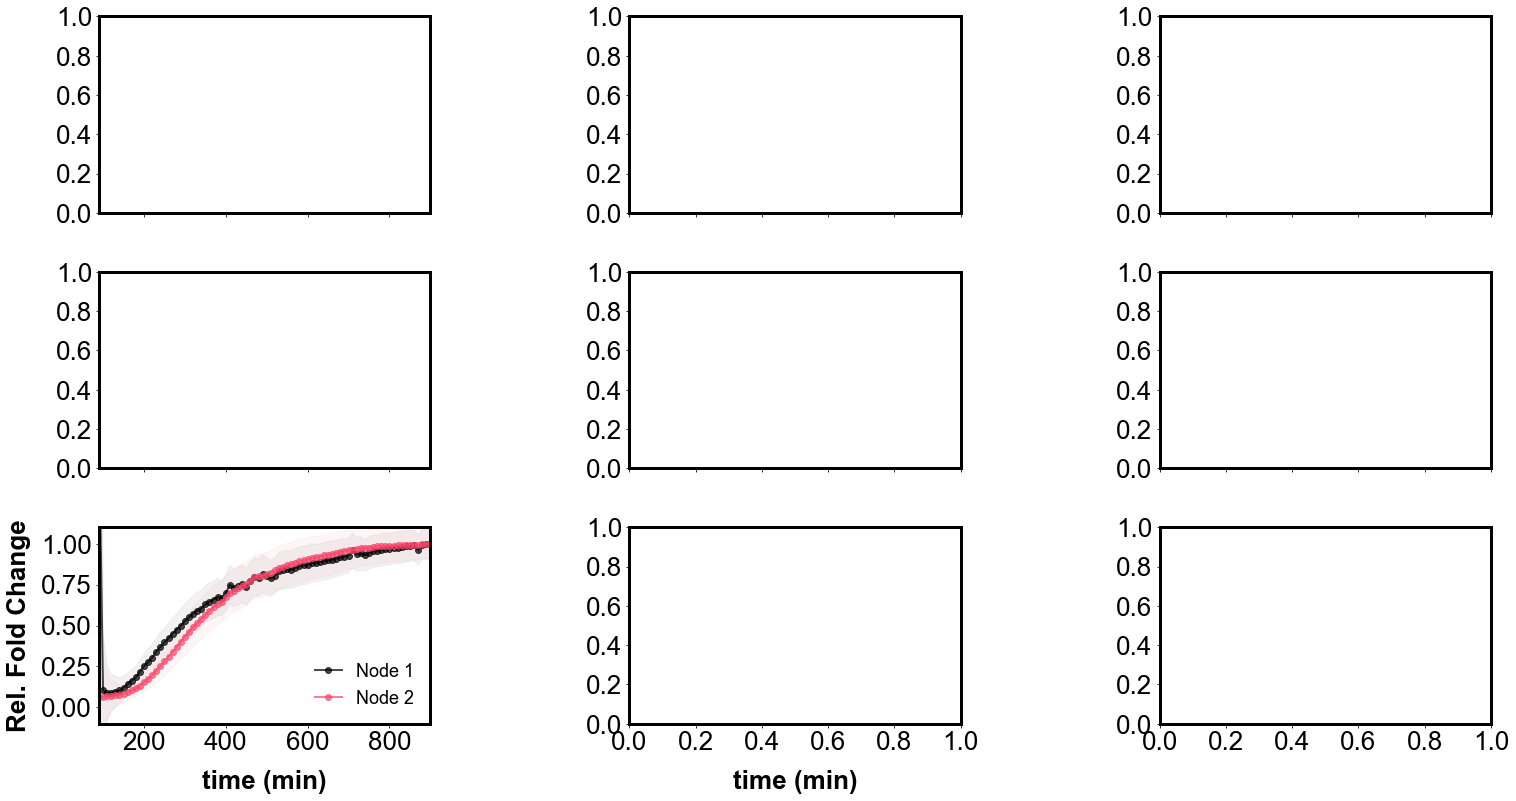

In [35]:
mpl.rcParams['font.size'] = '26'

cols = ['.2nM_Y', '1nM_Y', '2nM_Y', '4nM_Y', '8nM_Y']
meansf = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = '3A fraction propagated', names = ['time',*cols], usecols = 'A:F', skiprows = 3, nrows = 142)
stdsf = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = '3A fraction propagated', names = cols, usecols = 'J:N', skiprows = 3, nrows = 142)
meansf.time = meansf.time.map(lambda t: t.hour*60+t.minute)

meanso = pd.read_excel('raw_data/Figure 3 plotting data.xlsx', sheet_name = 'Fig3A center', names = ['time','0nM_Y',*cols], usecols = 'A:G', skiprows = 153, nrows = 142)
meansol = pd.read_excel('raw_data/Figure 3 plotting data.xlsx', sheet_name = 'Fig3A center', names = [*cols], usecols = 'J:N', skiprows = 153, nrows = 142)

stdso = pd.read_excel('raw_data/Figure 3 plotting data.xlsx', sheet_name = 'Fig3A center', names = ['0nM_Y',*cols], usecols = 'V:AA', skiprows = 153, nrows = 142)
stdsol = pd.read_excel('raw_data/Figure 3 plotting data.xlsx', sheet_name = 'Fig3A center', names = [*cols], usecols = 'AD:AH', skiprows = 153, nrows = 142)

meansi = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = '3A_input', names = ['time','input'], usecols = 'A:B', skiprows = 5, nrows = 142)
stdsi = pd.read_excel('raw_data/201111_Fig3.xlsx', sheet_name = '3A_input', names = ['input'], usecols = 'D', skiprows = 5, nrows = 142)


fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (24,14), sharex ='col')
fig.tight_layout(pad=pad)
fig.subplots_adjust(hspace=0.1)

ax[2,0].plot(meansf.time, meansi['input']/(meansi['input'].iloc[90]),'o-', color = 'k', alpha = 0.7)
ax[2,0].fill_between(meansf.time, (meansi['input']-stdsi['input'])/(meansi['input'].iloc[90]), (meansi['input']+stdsi['input'])/(meansi['input'].iloc[90]), color = 'k', alpha = 0.05)

colors = np.flip(['#18a9f9','#9551ad','#fc466b'])
for i,(k,l) in enumerate(zip([cols[3]],['Y = 4nM','Y = 1nM','Y = 0.1nM'])):
    ax[2,0].plot(meansf.time, meanso[k]/(meanso[k].iloc[90]),'o-', color = colors[i], alpha = 0.7)
    ax[2,0].fill_between(meansf.time, (meanso[k]-stdso[k])/(meanso[k].iloc[90]), (meanso[k]+stdso[k])/(meanso[k].iloc[90]), color = colors[i], alpha = 0.05)
    ax[2,0].legend([l], frameon = False, fontsize = 20, handlelength=1.5)

    ax[2,1].set_xlabel('time (min)', labelpad = xpad)

ax[2,0].set_xlim([90,900])
ax[2,0].set_ylim([-0.1,1.1])
ax[2,0].set_xlabel('time (min)', labelpad = xpad)
ax[2,0].set_ylabel('Rel. Fold Change', labelpad = ypad)
ax[2,0].legend(['Node 1','Node 2'], frameon = False,loc = 'lower right', fontsize = 18, handlelength=1.5)


#fig.savefig("210413_FigS12.svg", format = 'svg')
fig.subplots_adjust(wspace=0.6, hspace=0.3)
mpl.rcParams['font.size'] = '16'


## Figure S13<a id="SI_Extra"></a>

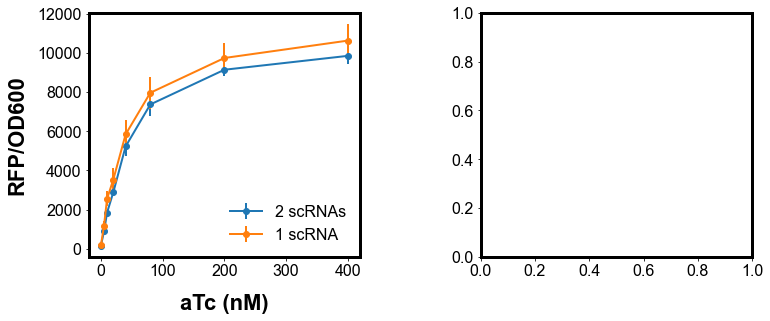

In [36]:
#Figure 4A
means = pd.read_excel('raw_data/Figure S13_ additional scRNA expression doesnt affect CRISPRa.xlsx',sheet_name = -1, names = ['aTc','2 scRNAs','1 scRNA'], usecols = 'A:C', skiprows = 4, nrows = 9)
stds = pd.read_excel('raw_data/Figure S13_ additional scRNA expression doesnt affect CRISPRa.xlsx',sheet_name = -1, names = ['2 scRNAs','1 scRNA'], usecols = 'F:G', skiprows = 4, nrows = 9)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=pad)

for l in ['2 scRNAs','1 scRNA']:
    ax[0].errorbar(means.aTc, means[l], stds[l], fmt = 'o-', label = l)
ax[0].set_xlabel('aTc (nM)', labelpad = xpad, size = 22)
ax[0].set_ylabel('RFP/OD600', labelpad = ypad, size= 22)
ax[0].legend(frameon=False)

#fig.savefig("210510_FigS13.svg", format = 'svg')